# Radar Charts in Soccer
Creating Radar Charts to compare two players in soccer

In [2]:
# Importing Packages
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [3]:
# Read in Data
df = pd.read_csv('radars.csv')
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams\Che-Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,34-058,1987,3.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


### Data Cleaning

In [4]:
df['Player'] = df['Player'].str.split('\\',expand = True)[0] # Split from backslash
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
4,5,Adrián,es ESP,GK,Liverpool,34-058,1987,3.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


### Filtering for Players

In [6]:
players = df[(df['Player']=='Tammy Abraham') | 
        (df['Player']=='Timo Werner')].reset_index()
players

,index,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,2,Tammy Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
1,481,482,Timo Werner,de GER,FW,Chelsea,24-361,1996,20.5,5,...,13.7,0,0,0,8.4,8.4,0.15,-3.4,-3.4,Matches


### Dropping Irrelevant Columns

In [7]:
players = players.drop(['index', 'Rk', 'Nation', 'Pos', 'Squad',
              'Age', 'Born', '90s', 'FK', 'PKatt', 'Matches'], 
            axis = 1)
players.head()

,Player,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,PK,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Tammy Abraham,6,31,13,41.9,2.73,1.15,0.19,0.46,9.9,0,5.6,5.6,0.18,0.4,0.4
1,Timo Werner,5,55,21,38.2,2.69,1.03,0.09,0.24,13.7,0,8.4,8.4,0.15,-3.4,-3.4


### List of Parameters for Chart

In [8]:
params = list(players.columns)
params = params[1:]
params

['Gls',
 'Sh',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'Dist',
 'PK',
 'xG',
 'npxG',
 'npxG/Sh',
 'G-xG',
 'np:G-xG']

### Setting Ranges for the Parameters

In [9]:
ranges = []
a_values = []
b_values = []

# Loops to add values to lists
for x in params:
    a = min(players[params][x])
    a = 0.75*a
    
    b = max(players[params][x])
    b = 1.25*b
    
    ranges.append((a,b))

for x in range(len(players['Player'])):
    if players['Player'][x]  == 'Tammy Abraham':
        a_values = players.iloc[x].values.tolist()
    if players['Player'][x] == 'Timo Werner':
        b_values = players.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]
values = [a_values, b_values]

In [10]:
ranges

[(3.75, 7.5),
 (23.25, 68.75),
 (9.75, 26.25),
 (28.650000000000002, 52.375),
 (2.0175, 3.4125),
 (0.7725, 1.4375),
 (0.0675, 0.2375),
 (0.18, 0.5750000000000001),
 (7.425000000000001, 17.125),
 (0.0, 0.0),
 (4.199999999999999, 10.5),
 (4.199999999999999, 10.5),
 (0.11249999999999999, 0.22499999999999998),
 (-2.55, 0.5),
 (-2.55, 0.5)]

In [11]:
a_values

[6, 31, 13, 41.9, 2.73, 1.15, 0.19, 0.46, 9.9, 0, 5.6, 5.6, 0.18, 0.4, 0.4]

In [12]:
b_values

[5, 55, 21, 38.2, 2.69, 1.03, 0.09, 0.24, 13.7, 0, 8.4, 8.4, 0.15, -3.4, -3.4]

In [13]:
 values

[[6, 31, 13, 41.9, 2.73, 1.15, 0.19, 0.46, 9.9, 0, 5.6, 5.6, 0.18, 0.4, 0.4],
 [5,
  55,
  21,
  38.2,
  2.69,
  1.03,
  0.09,
  0.24,
  13.7,
  0,
  8.4,
  8.4,
  0.15,
  -3.4,
  -3.4]]

### Title of Chart

In [14]:
title = dict(
    title_name = 'Tammy Abraham',
    title_color = 'yellow',
    subtitle_name = 'Chelsea',
    subtitle_color = 'blue',
    title_name2 = 'Timo Werner',
    title_color2 = 'red',
    subtitle_name2 = 'Chelsea',
    subtitle_color2 = 'blue',
    title_fontsize = 18,
    subtitle_fontsize = 15
)

endnote = 'Aryaman B \ndata via FBREF / Statsbomb'

### Creating Radar

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


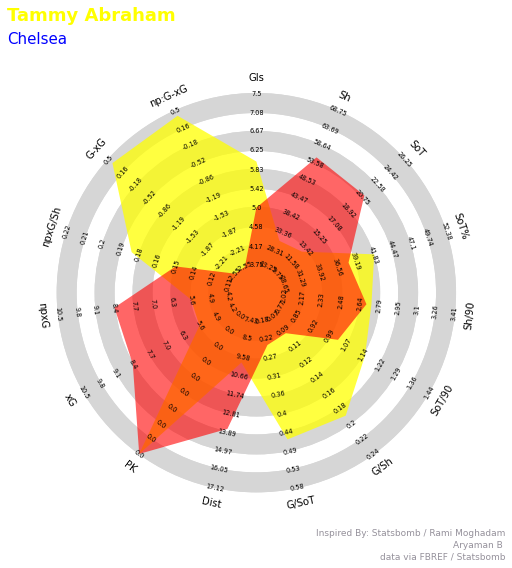

In [15]:
radar = Radar()
fig,ax = radar.plot_radar(ranges = ranges, 
                          params = params,
                          values = values,
                          radar_color = ['yellow', 'red'],
                          alphas = [0.75,0.6],
                          title = title,
                          endnote = endnote,
                          compare = True)